<a href="https://colab.research.google.com/github/EddyGiusepe/KMeans_Clustering_exemplo/blob/main/KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Means Clustering  


Para este projeto, usaremos o ``KMeans Clustering`` para agrupar Universidades em dois grupos: **Privadas** e **Públicas**.


É muito importante observar, nós realmente temos os rótulos para este conjunto de dados, mas NÃO os usaremos para o algoritmo de agrupamento ``KMeans``, pois esse é um algoritmo de **aprendizado não supervisionado**.

**Ao usar o algoritmo Kmeans em situações reais, você não possuirá rótulos**. Nesse caso, usaremos os rótulos para tentar ter uma idéia do quão bem o algoritmo foi executado, apenas.

## Os dados

Usaremos um quadro de dados com $777$ observações sobre as $18$ variáveis a seguir.
* ``Private``: Um fator com níveis Não e Sim, indicando universidade privada ou pública.
* ``Apps``: Número de inscrições recebidas.
* ``Accept``: Quantidade de inscrições aceitas.
* ``Enroll``: Número de estudantes matriculados.
* ``Top10perc``: Percentual de novos estudantes vindo do grupo de $10\%$ melhores do segundo grau.
* ``Top25perc``: Percentual de novos estudantes vindo do grupo de $25\%$ melhores do segundo grau.
* ``F.Undergrad``: Número de alunos de graduação em tempo integral.
* ``P.Undergrad`` Número de alunos de graduação em tempo parcial.
* ``Outstate``: Aulas fora do estado.
* ``Room.Board``: Custos da sala.
* ``Books``: Custos de livros estimados.
* ``Personal``: Estimativa de gastos por pessoa.
* ``PhD``: Percentual de PHD's na universidade.
* ``Terminal``: Percentual da faculdade com graduação.
* ``S.F.Ratio``: Taxa estudantes/faculdade.
* ``perc.alumni``: Percentual dos ex-alunos que doam.
* ``Expend``: Despesas da instituição por aluno.
* ``Grad.Rate``: Taxa de graduação

### Importamos nossas bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



### Fazemos a leitura de nossos Dados

Leia o arquivo ``College_Data`` usando **read_csv**. Aqui vamos a setar a primeira coluna como índice.


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Programas_Python_do_Jupyter_Notebook_cursos_que_comprei/College_Data')

In [3]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [7]:
# Aqui consideramos a nossa primeira coluna como índice --> " index_col=0 " 

df = pd.read_csv('/content/drive/MyDrive/Programas_Python_do_Jupyter_Notebook_cursos_que_comprei/College_Data', index_col=0)

In [8]:
# Verificamos o cabeçalho dos Dados
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [9]:
# Verificamos o método: info()
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [10]:
# Verificamos o método: describe()
df.describe()


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


### Análise exploratória de dados

Vamos criar algumas visualizações dos Dados.

Criamos um scatterplot de Grad.Rate versus Room.Board onde os pontos são coloridos pela coluna "Private".

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


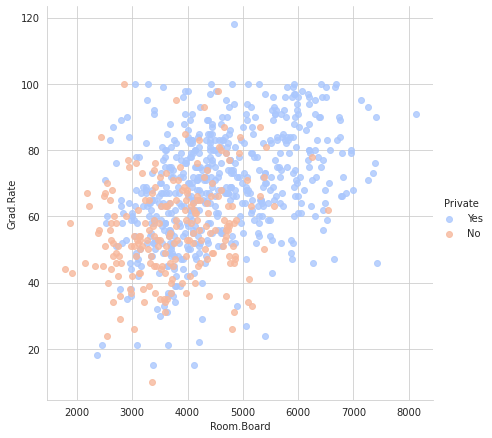

In [13]:
sns.set_style('whitegrid')

sns.lmplot('Room.Board', 'Grad.Rate', data=df, hue='Private', fit_reg=False,
           size=6, palette='coolwarm')

Criamos um ``scatterplot`` de ``F.Undergrad`` versus ``Outstate`` onde os pontos são coloridos pela coluna Private.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


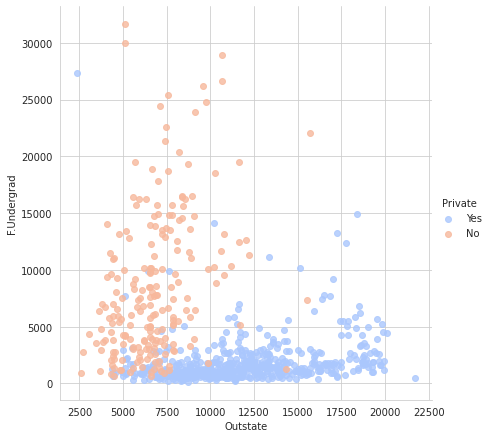

In [14]:
sns.lmplot('Outstate', 'F.Undergrad', data=df, hue='Private', fit_reg=False,
           size=6, palette='coolwarm')

Criamos um histograma empilhado que mostra o "Out of State Tuition" com base na coluna Private. Tente fazer isso usando [sns.FacetGrid](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.FacetGrid.html). Se isso for muito complicado, veja se você pode fazê-lo apenas usando duas instâncias de ``pandas.plot(kind='hist')``.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


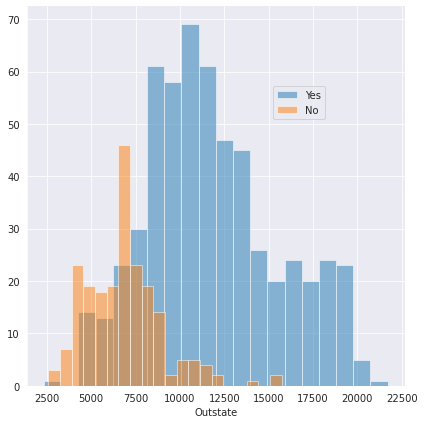

In [15]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df, hue='Private', size=6)
g = g.map(plt.hist, 'Outstate', bins=20, alpha=0.5)

plt.legend(bbox_to_anchor=(1, 1), loc=1,  borderaxespad=8)

De maneira similar criamos um histograma para a coluna ``Grad.Rate``.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


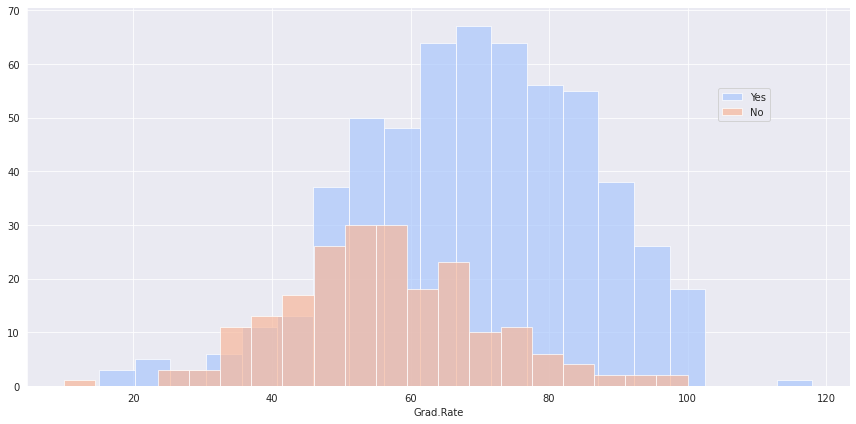

In [16]:
sns.set_style('darkgrid')


g = sns.FacetGrid(df, hue='Private', size=6, palette='coolwarm', aspect=2)
g = g.map(plt.hist, 'Grad.Rate', bins=20, alpha=0.7)

plt.legend(bbox_to_anchor=(1, 1), loc=1,  borderaxespad=8)

Observamos que parece haver uma escola particular com uma taxa de graduação superior a $100\%$. A seguir veremos os nome dessa escola:

In [17]:
df[df['Grad.Rate']>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


Definimos a taxa de graduação dessa escola para $100$ para que isso faça sentido. Você pode obter um aviso (e não um erro) ao fazer esta operação, basta usar operações de dataframe ou simplesmente re-fazer a visualização do histograma para garantir que ela realmente foi alterado. Assim:

In [18]:
df['Grad.Rate']['Cazenovia College'] = 100

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
# Vejamos outra vez:

df[df['Grad.Rate']>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


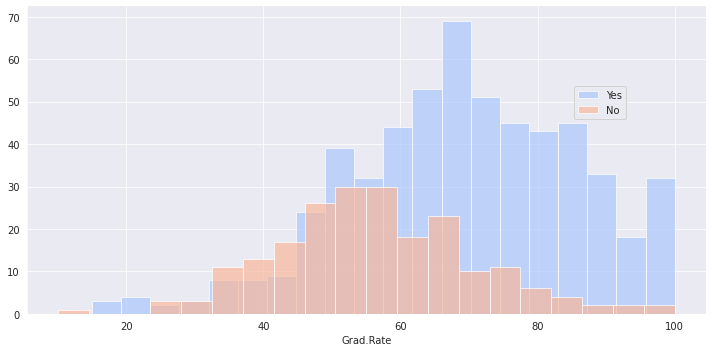

In [24]:
# Vizualizando outra vez

sns.set_style('darkgrid')
g = sns.FacetGrid(df, hue='Private', height=5 ,palette='coolwarm', aspect=2)
g = g.map(plt.hist, 'Grad.Rate', bins=20, alpha=0.7)

plt.legend(bbox_to_anchor=(1, 1), loc=1,  borderaxespad=8)

## Criamos o clusters "K Means"

Agora é hora de criar os rótulos de Cluster!

Importamos ``KMeans`` da ``SciKit Learn``.

In [25]:
# Importando

from sklearn.cluster import KMeans

**Criamos uma instância do modelo K Means com $2$ Cluster**.

In [26]:
kmeans = KMeans(n_clusters=2)

Fitamos o modelo para todos os dados, exceto para o rótulo privado.

In [27]:
kmeans.fit(df.drop('Private', inplace=False, axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Nos perguntamos: quais são os vetores centrais do clusters ?

In [30]:
kmeans.cluster_centers_

array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01],
       [1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01]])

### Avaliação

Não há uma maneira perfeita de avaliar o agrupamento se você não tiver os rótulos, no entanto, como isso é apenas um exercício, temos os rótulos então aproveitamos isso para avaliar nossos clusters. **Tenha em mente que não terá esse luxo no mundo real**.

Criamos uma nova coluna para ``df`` chamado *Cluster*, que é $1$ para escola particular e $0$ para uma escola pública.

In [31]:
# Observamos que em nosso df  o "Private " é um parâmetro categórico por que tem "Yes" ou "No"
# Vamos converter isso a número

def converter(cluster):
  if cluster == 'Yes':
    return 1
  else:
    return 0  



Em nosso DataFrame aparecera um coluna "Cluster" com valores de $0$ ou $1$.

In [32]:
df['Cluster'] = df['Private'].apply(converter)

In [33]:
# Visualizamos nosso DataFrame

df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


Vamos criar uma ``matriz de confusão`` e um ``relatório de classificação`` para ver o quão bem o **clustering K Means** funcionou sem ter nenhum rótulo.

In [34]:
from sklearn.metrics import confusion_matrix, classification_report


# Matriz de confusão
print(confusion_matrix(df['Cluster'], kmeans.labels_))

[[ 74 138]
 [ 34 531]]


In [35]:
# Relatório
print(classification_report(df['Cluster'], kmeans.labels_))


              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777



Não tão ruim, considerando que o algoritmo está usando apenas os recursos para agrupar as universidades em 2 grupos distintos. Espero que você possa começar a ver como K Means é útil para agrupar dados não rotulados!